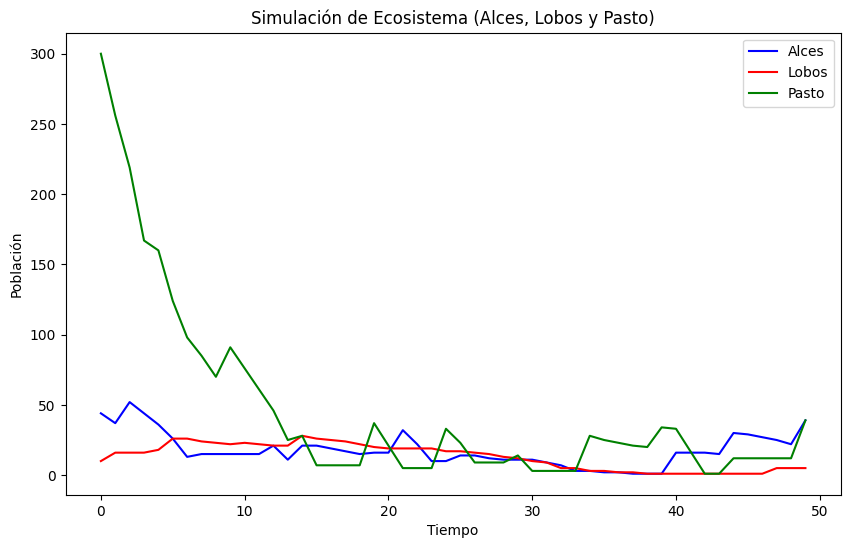

In [21]:
# Asegurarse de que las gráficas se muestren en el notebook
%matplotlib inline

import random
import matplotlib.pyplot as plt

class Ecosistema:
    def __init__(self, cant_alces, cant_lobos, cant_pasto, tiempo_crecer_pasto):
        self.alces = cant_alces
        self.lobos = cant_lobos
        self.pasto = cant_pasto
        self.tiempo_crecer_pasto = tiempo_crecer_pasto
        self.tiempo = 0
        self.historial_alces = []
        self.historial_lobos = []
        self.historial_pasto = []

    def crecer_pasto(self):
        if self.tiempo % self.tiempo_crecer_pasto == 0:
            self.pasto += random.randint(10, 50)

    def alimentar_alces(self):
        if self.pasto >= self.alces:
            self.pasto -= self.alces
            if random.random() < 0.3:
                self.alces += random.randint(1, 25)
        else:
            self.alces -= random.randint(1, 2)
        if random.random() < 0.1:
            self.alces -= random.randint(1, 3)
        self.alces = max(self.alces, 0)

    def alimentar_lobos(self):
        if self.alces >= self.lobos:
            self.alces -= self.lobos // 2
            if random.random() < 0.2:
                self.lobos += random.randint(1, 8)
        else:
            self.lobos -= random.randint(1, 2)
        if random.random() < 0.15:
            self.lobos -= random.randint(1, 2)
        self.lobos = max(self.lobos, 0)

    def actualizar_ecosistema(self):
        self.crecer_pasto()
        self.alimentar_alces()
        self.alimentar_lobos()
        self.historial_alces.append(self.alces)
        self.historial_lobos.append(self.lobos)
        self.historial_pasto.append(self.pasto)

    def simular(self, duracion):
        for _ in range(duracion):
            self.tiempo += 1
            self.actualizar_ecosistema()

# Parámetros iniciales
ecosistema = Ecosistema(cant_alces=50, cant_lobos=10, cant_pasto=350, tiempo_crecer_pasto=5)

# Ejecuta la simulación por 200 pasos de tiempo
ecosistema.simular(50)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(ecosistema.historial_alces, label='Alces', color='blue')
plt.plot(ecosistema.historial_lobos, label='Lobos', color='red')
plt.plot(ecosistema.historial_pasto, label='Pasto', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Simulación de Ecosistema (Alces, Lobos y Pasto)')
plt.legend()
plt.show()
